# Decision Tree to predict the risk of a heart attack

**Problem statement:**

Cardiovascular diseases are the leading cause of death globally.
It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner.

**Importing Librarires**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Loading the Dataset**

In [89]:
data = pd.read_csv('/content/HealthCareDataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1


# **1. Preliminary analysis**

In [90]:
print("Dataset Structure:")
print(data.info())

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       304 non-null    int64  
 1   sex       304 non-null    int64  
 2   cp        304 non-null    int64  
 3   trestbps  304 non-null    int64  
 4   chol      304 non-null    int64  
 5   fbs       304 non-null    int64  
 6   restecg   304 non-null    int64  
 7   thalach   304 non-null    int64  
 8   exang     304 non-null    int64  
 9   oldpeak   304 non-null    float64
 10  slope     303 non-null    float64
 11  ca        304 non-null    int64  
 12  thal      304 non-null    int64  
 13  target    304 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.4 KB
None


In [91]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       1
ca          0
thal        0
target      0
dtype: int64


In [92]:
print("\nDuplicates:")
print(data.duplicated().sum())


Duplicates:
1


In [93]:
# Remove duplicates
data = data.drop_duplicates()

In [94]:
# Remove null
data.dropna(inplace=True)

In [95]:
print("\nDuplicates After Removal:")
print(data.duplicated().sum())
print("\nMissing Values After Removal:")
print(data.isnull().sum())


Duplicates After Removal:
0

Missing Values After Removal:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [96]:
print(data.shape)

(302, 14)


# **2. Data report**

In [17]:
# a. Preliminary Statistical Summary
statistical_summary = print(data.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

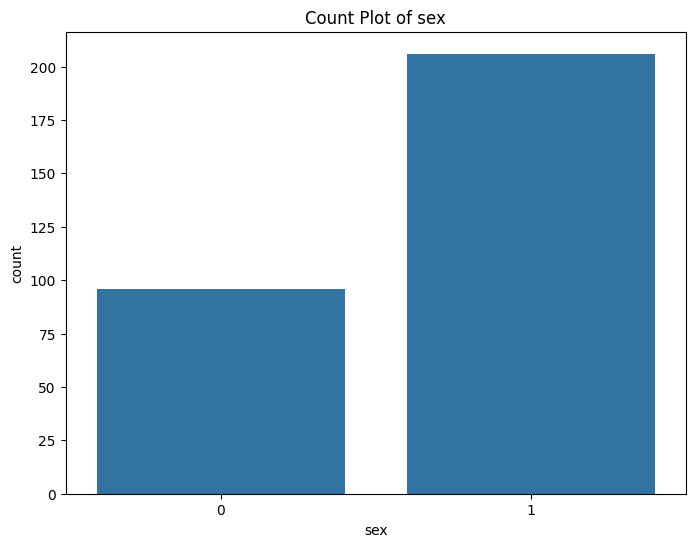

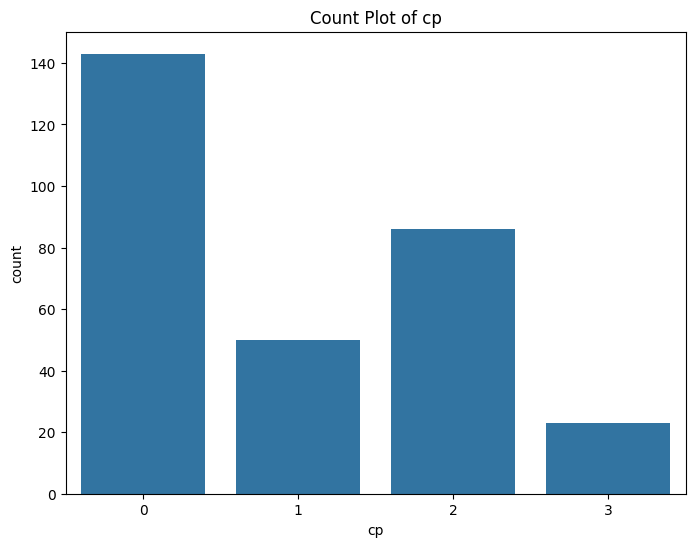

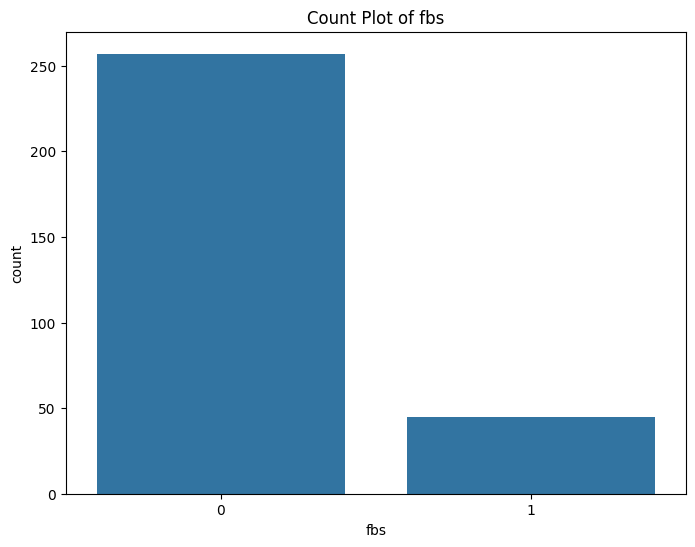

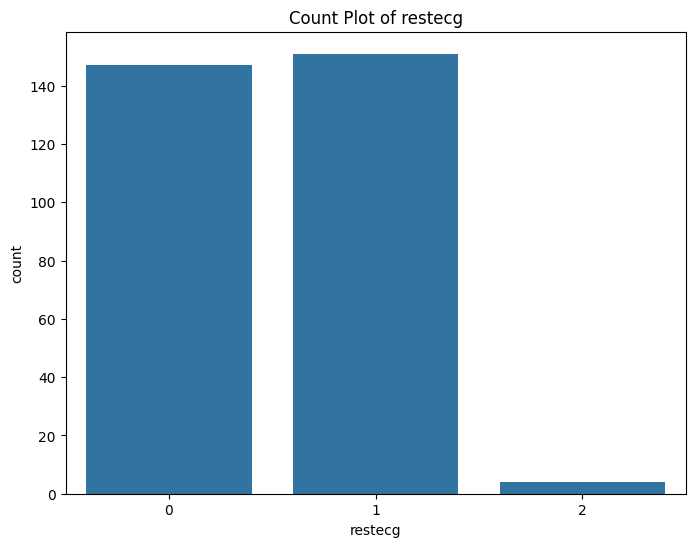

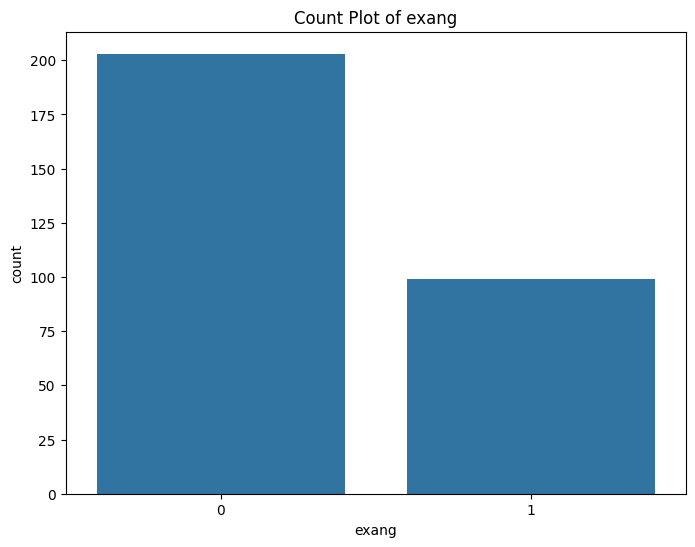

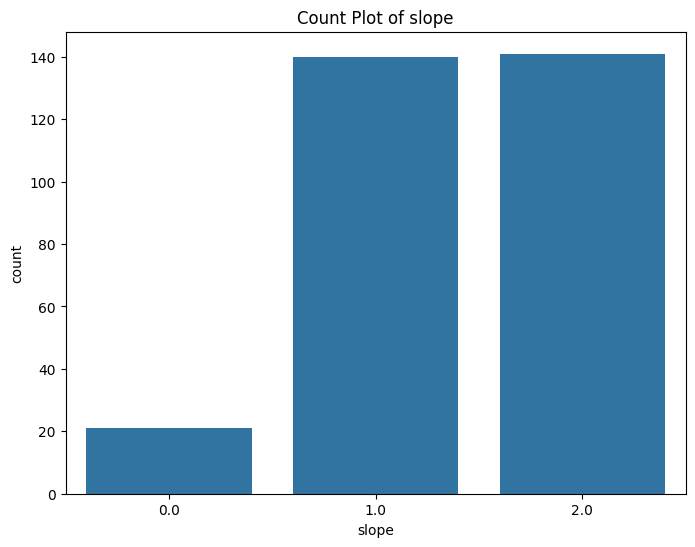

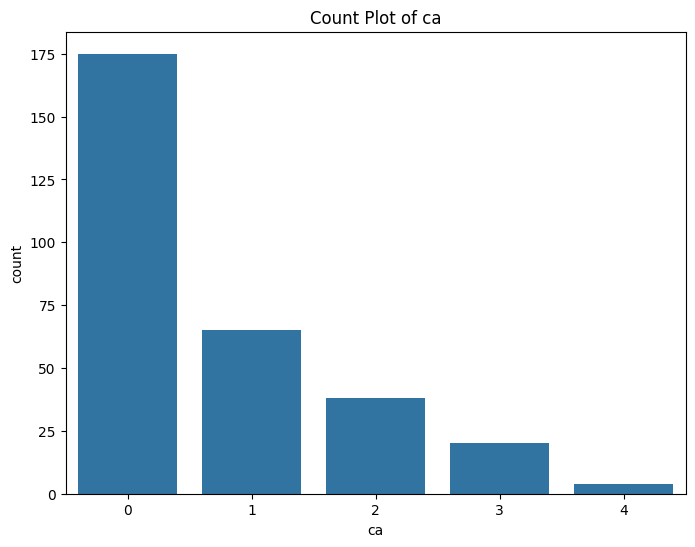

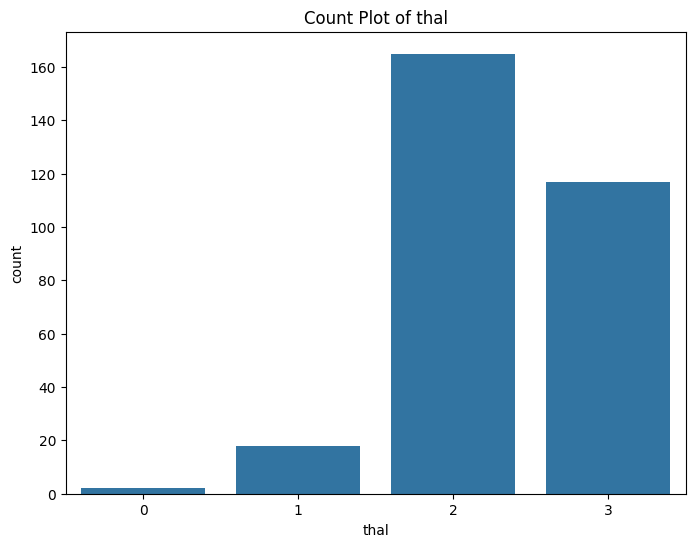

In [19]:
# b. Identify Categorical Variables
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Count Plot of {col}')
    plt.show()

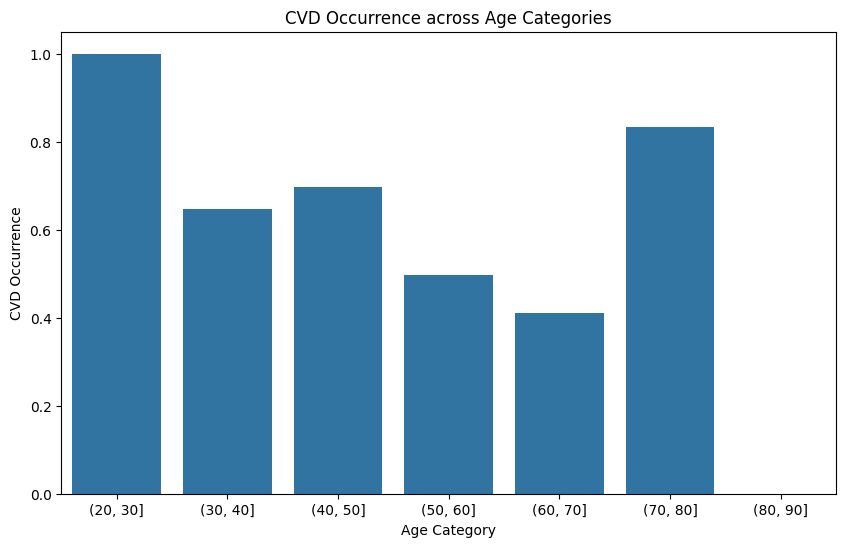

In [26]:
# c. Study CVD Occurrence across Age Categories
bins = pd.IntervalIndex.from_breaks([20, 30, 40, 50, 60, 70, 80, 90])
data['age_category'] = pd.cut(data['age'], bins=bins, labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
cvd_by_age = data.groupby('age_category')['target'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='target', data=cvd_by_age)
plt.title('CVD Occurrence across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('CVD Occurrence')
plt.show()

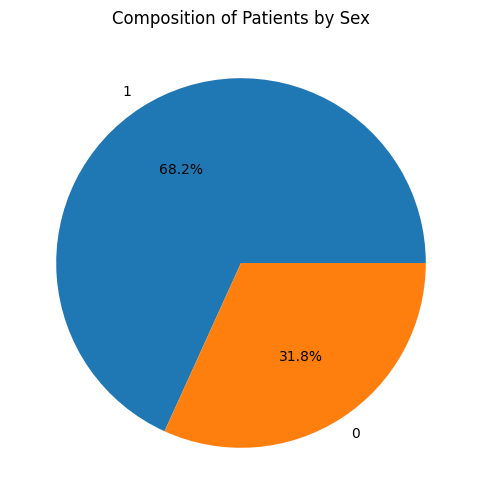

In [27]:
# d. Study Composition of Patients by Sex
sex_composition = data['sex'].value_counts(normalize=True).reset_index()
sex_composition.columns = ['Sex', 'Percentage']
plt.figure(figsize=(8, 6))
plt.pie(sex_composition['Percentage'], labels=sex_composition['Sex'], autopct='%1.1f%%')
plt.title('Composition of Patients by Sex')
plt.show()

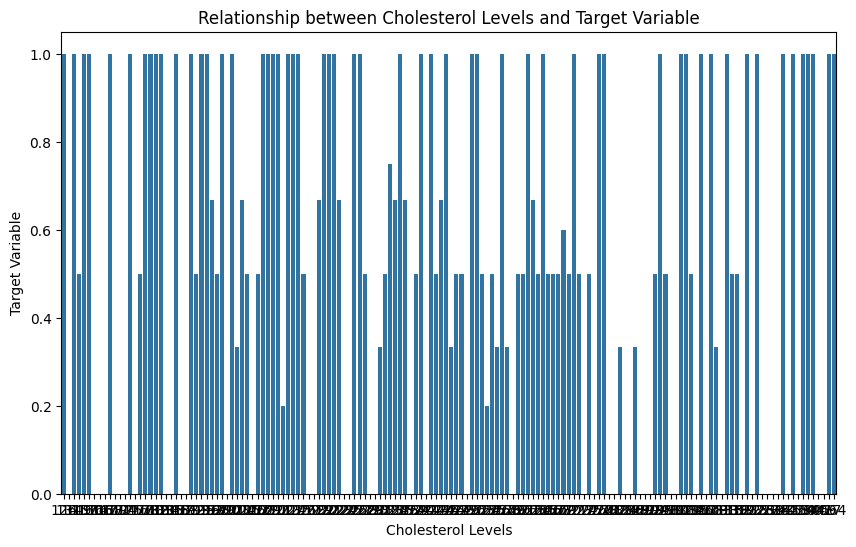

In [47]:
# e. Describe the relationship between cholesterol levels and the target variable
cholesterol_target = data.groupby('chol')['target'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='chol', y='target', data=cholesterol_target)
plt.title('Relationship between Cholesterol Levels and Target Variable')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Target Variable')
plt.show()

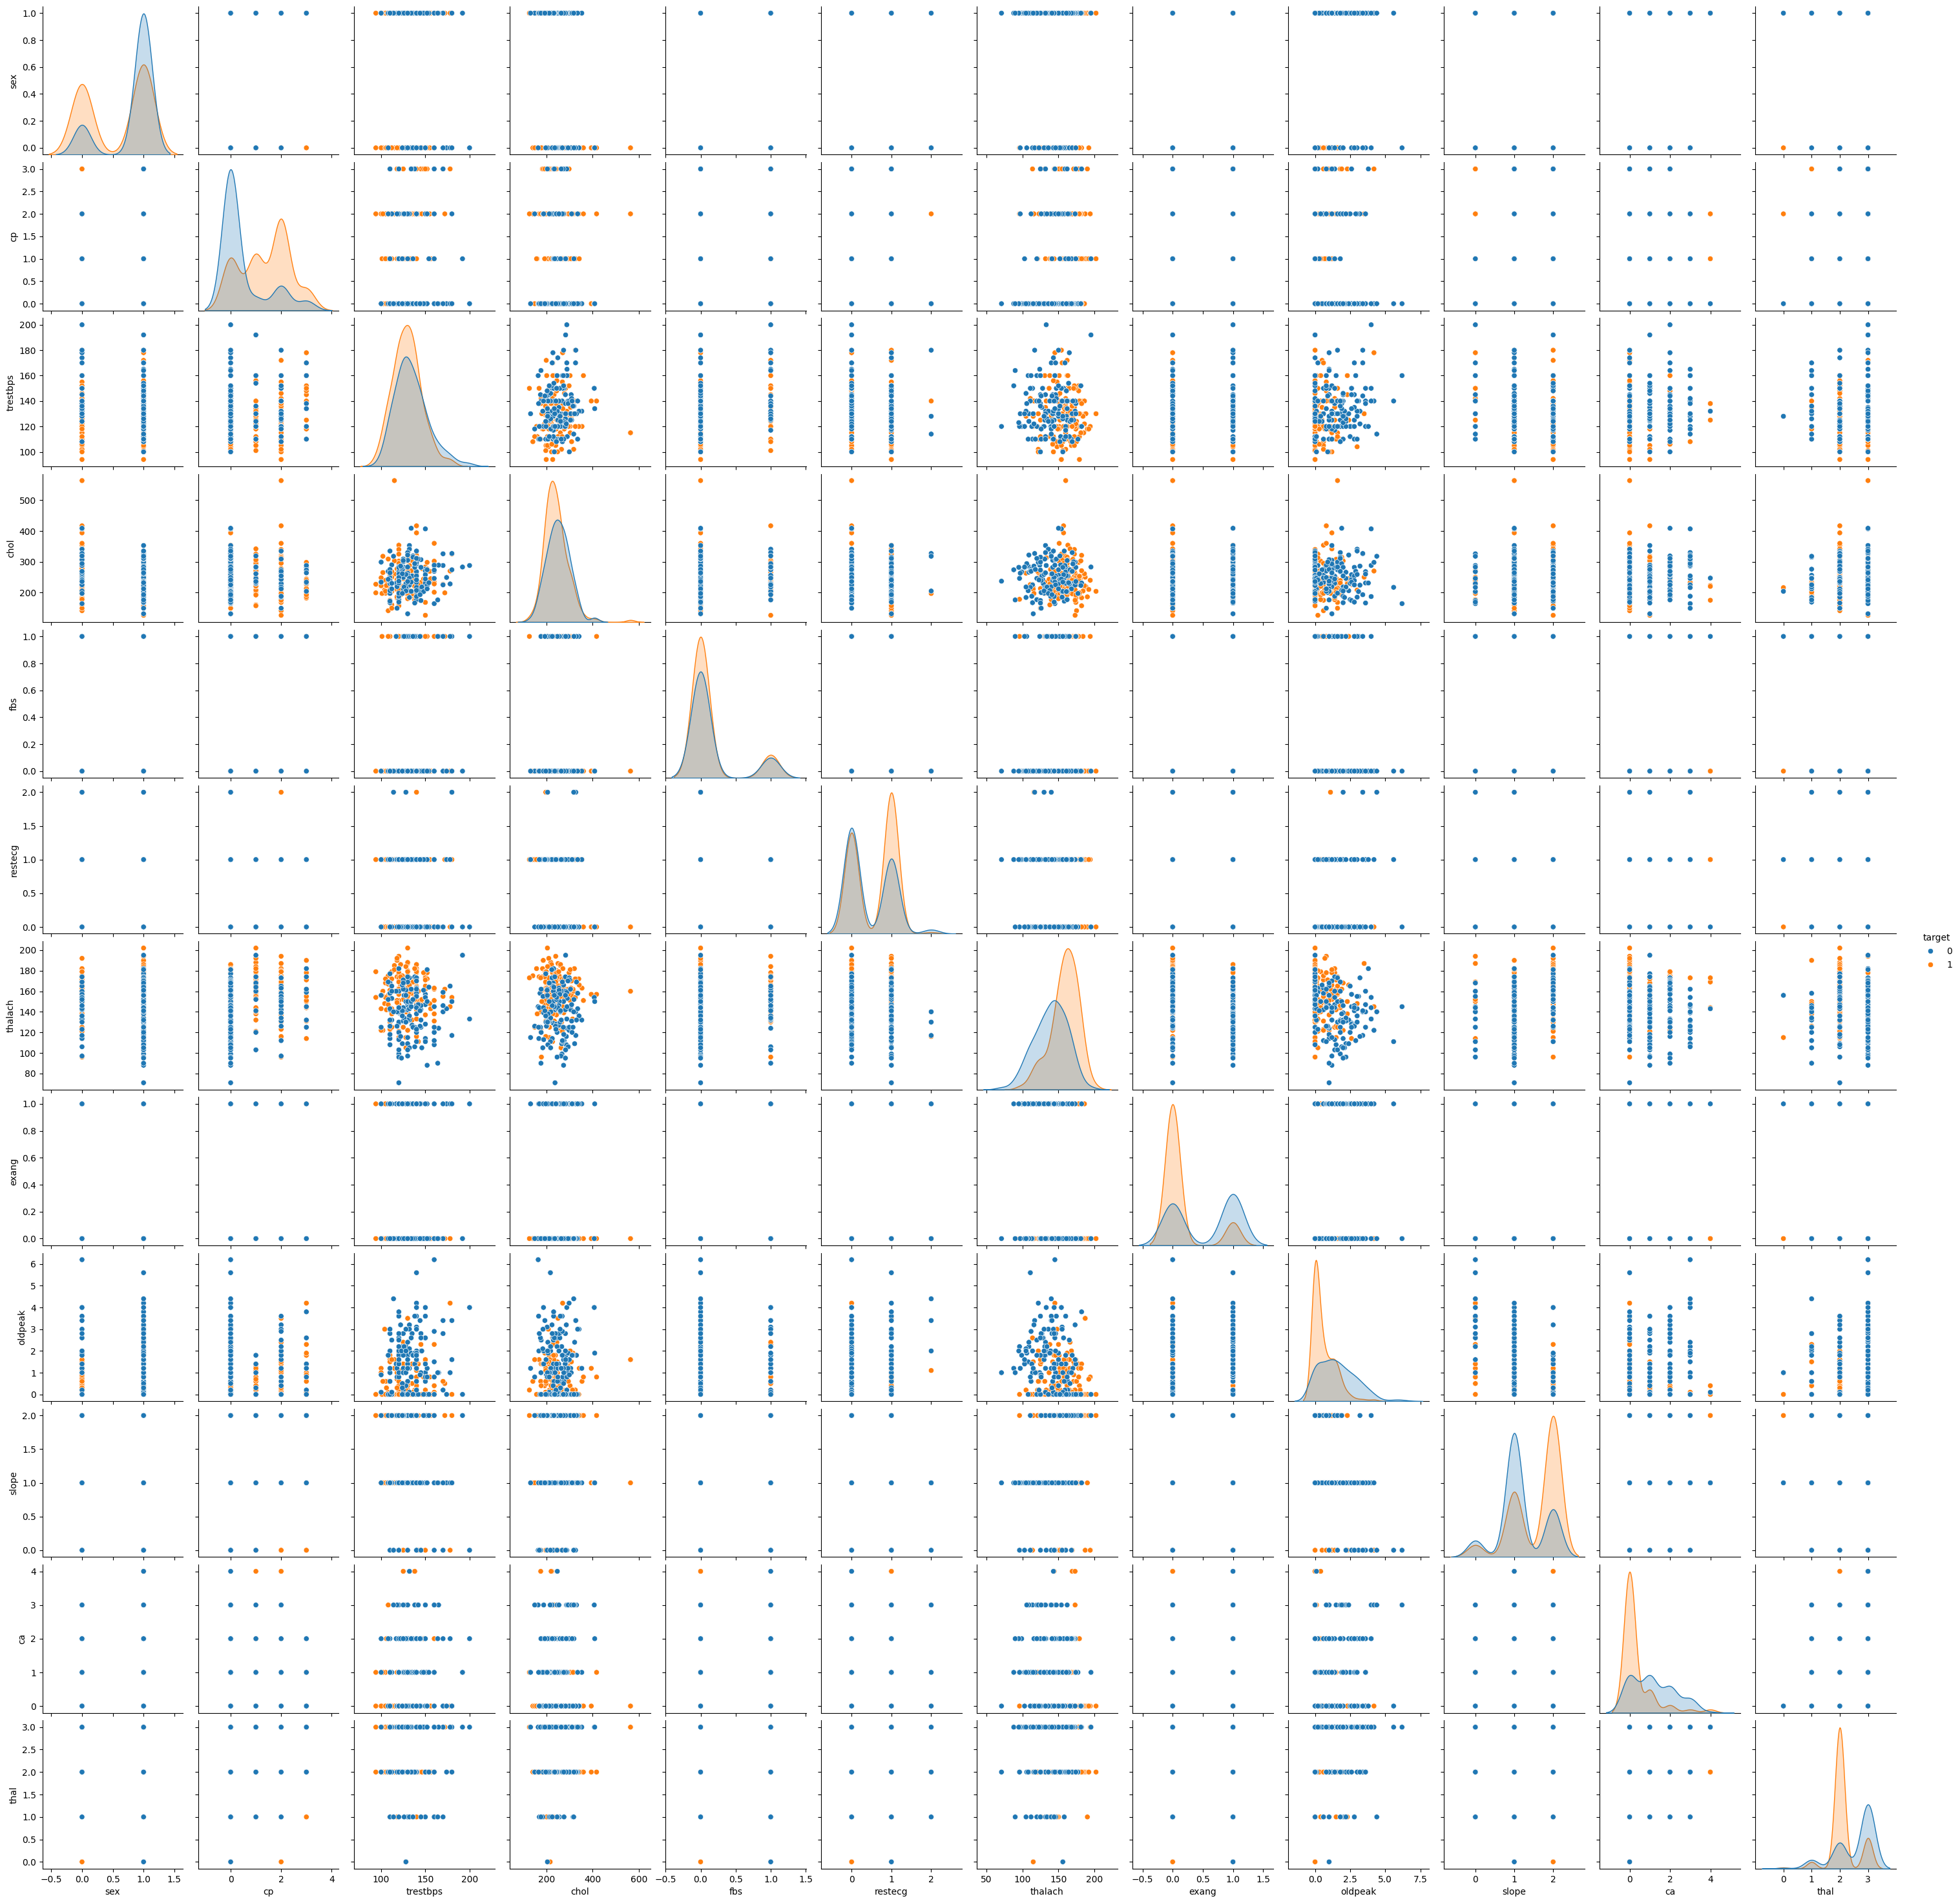

In [48]:
# f. Use a pair plot to understand the relationship between all the given variables
sns.pairplot(data, hue='target')
plt.show()

# **3. The model**

In [101]:
X = data.drop(columns=['target'])
print(X.shape)

(302, 13)


In [102]:
y = data['target']
print(y.shape)

(302,)


In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
# Build and train the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [107]:
# Make predictions
y_pred = dt_model.predict(X_test)

In [108]:
# Model assessment
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7868852459016393


In [109]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [110]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion_mat}')

Confusion Matrix:
[[22  5]
 [ 8 26]]


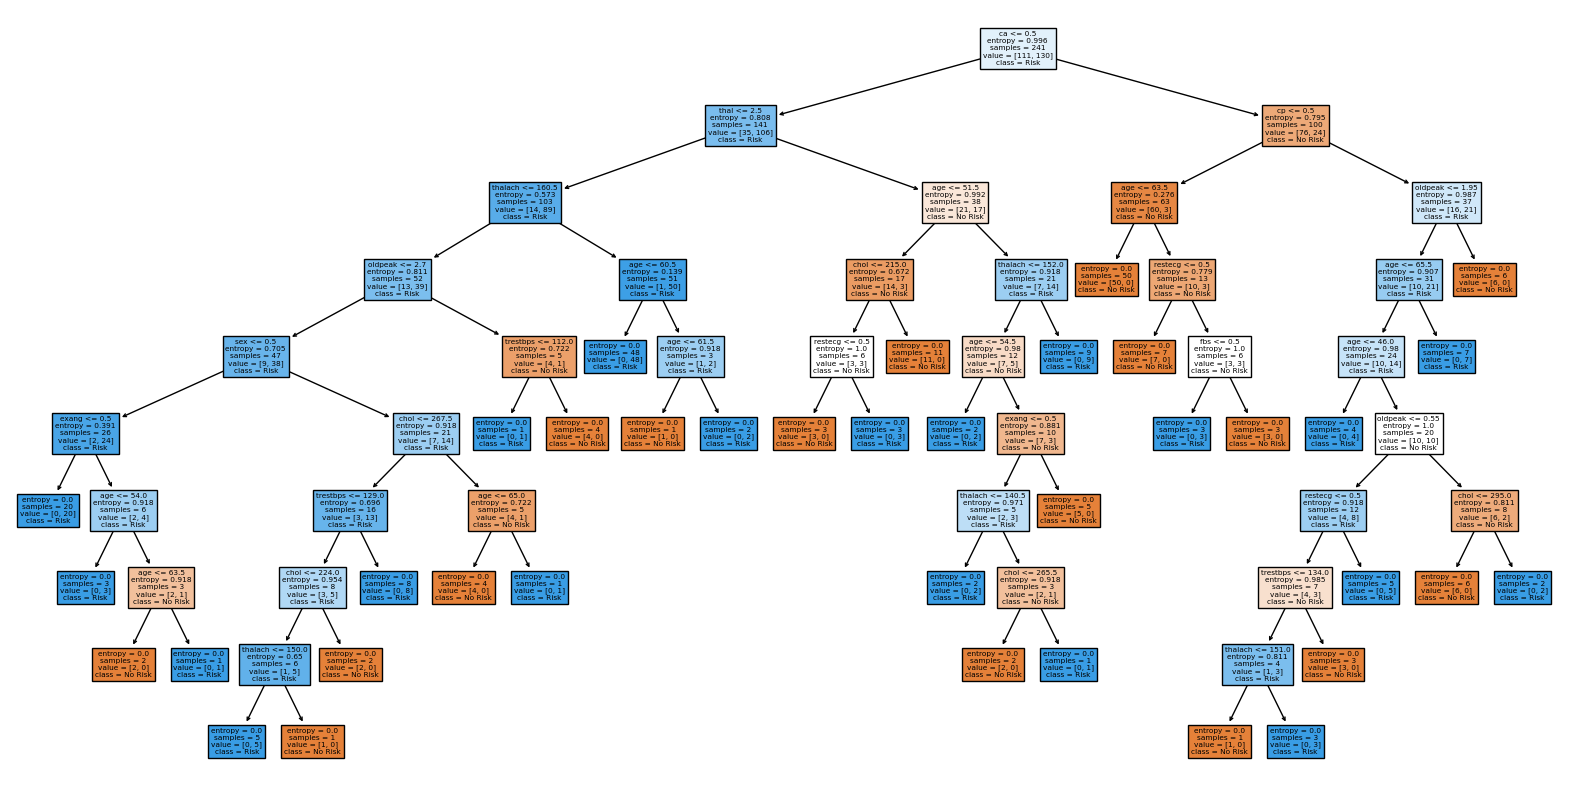

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Risk', 'Risk'])
plt.show()